In [30]:
import pandas as pd
import os
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

# Load Data

In [31]:
healthcare_data = pd.read_csv('./output_2.csv')
all_data = pd.read_csv('./updated_df.csv')

In [32]:
f = open('./state_reps/state_reps.txt', 'r')
state_reps = []
for line in f:
    if line.split('\t')[1] == "Vacant":
        continue
    state_reps.append(line.split('\t')[1])
f.close()

# Function to create pie charts

In [33]:
def plot_donations_from_healthcare(state_rep, donations_from_healthcare, total_donations):
    labels = 'Healthcare Industry', 'Other Industries'
    sizes = [donations_from_healthcare, total_donations]
    colors = ['red', 'blue']
    explode = (0.1, 0) 
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(state_rep)
    plt.axis('equal')
    plt.show()

# Calculate donations received

In [34]:
state_rep_donations = pd.DataFrame(columns = ['Rep_Name', 'donations_from_healthcare', 'total_donations'])
state_rep_donations['Rep_Name'] = state_reps
# state_rep_donations = state_rep_donations.drop_duplicates()

In [35]:
for idx,state_rep in enumerate(state_rep_donations['Rep_Name']):
    donations_from_healthcare = 0
    total_donations = 0
    for index,candidate in enumerate(healthcare_data['Full_Name']):
        if fuzz.ratio(state_rep, candidate) >= 75:
            donations_from_healthcare = donations_from_healthcare + healthcare_data.iloc[index]['Amount']
            
    for index,candidate in enumerate(all_data['Full_Name']):
        if fuzz.ratio(state_rep, candidate) >= 75:
            total_donations = total_donations + all_data.iloc[index]['Amount']
            
    state_rep_donations.iloc[idx]['donations_from_healthcare'] = donations_from_healthcare
    state_rep_donations.iloc[idx]['total_donations'] = total_donations

In [36]:
state_rep_donations.to_csv(r'.\state_rep_donations.csv', index = False)

## Make Graphs

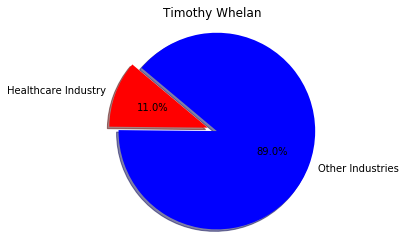

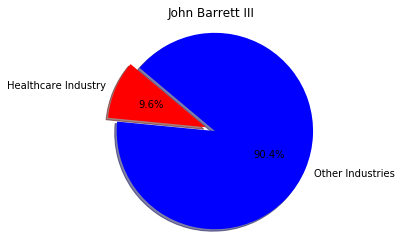

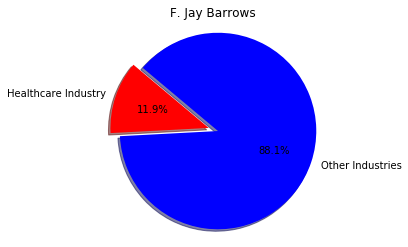

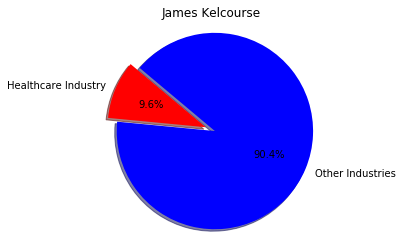

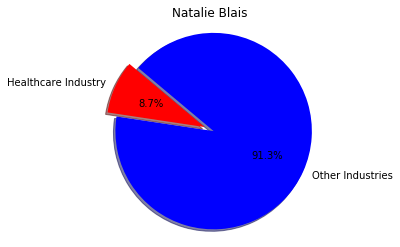

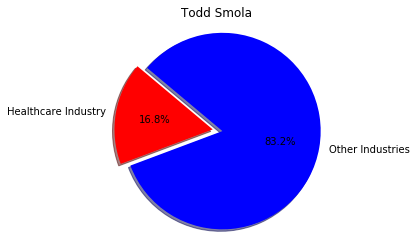

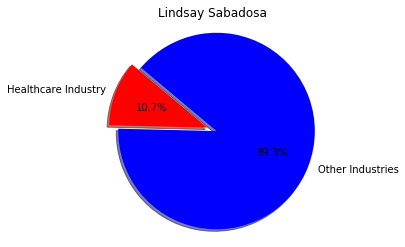

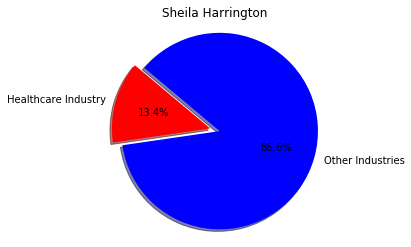

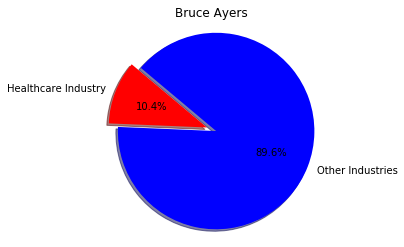

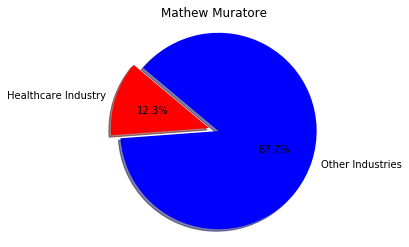

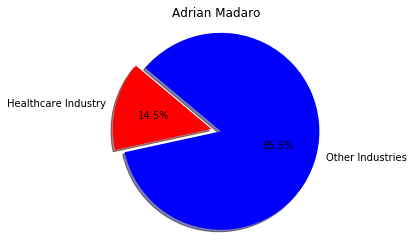

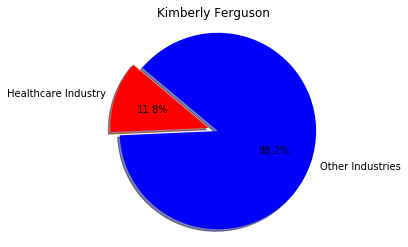

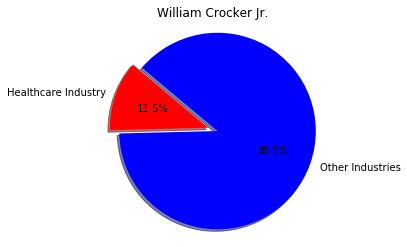

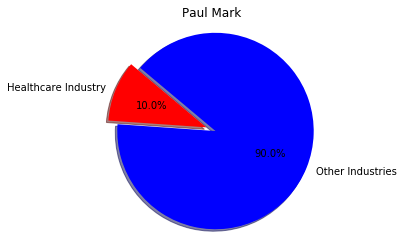

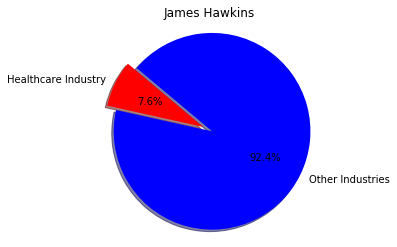

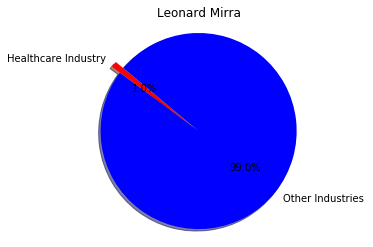

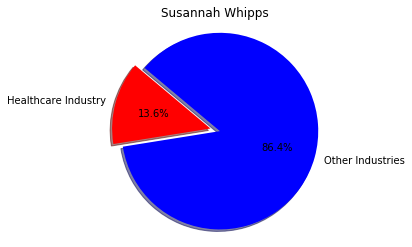

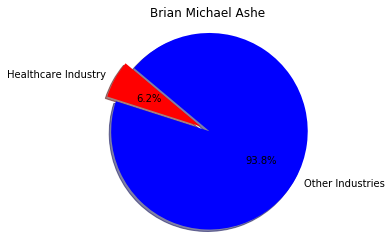

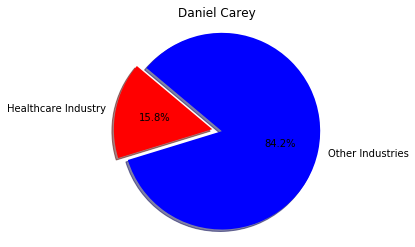

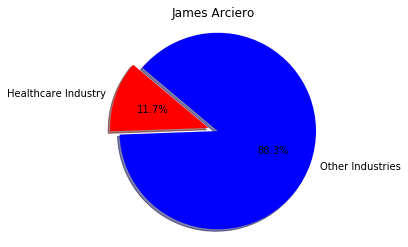

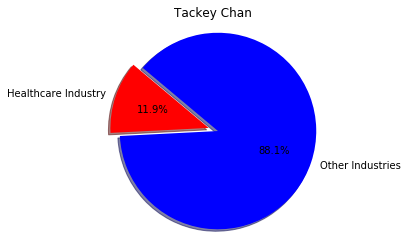

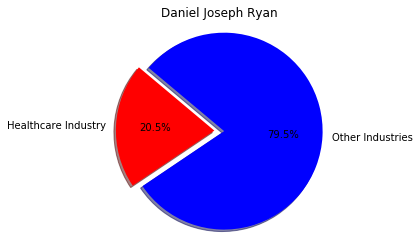

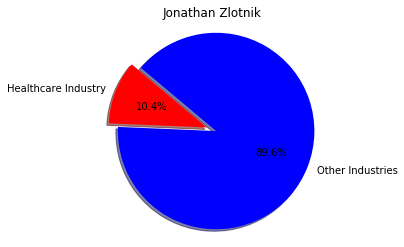

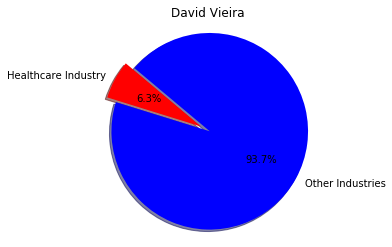

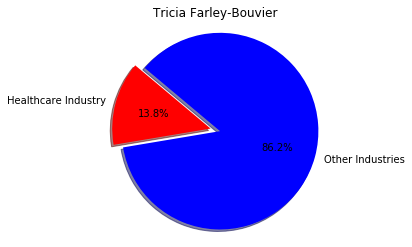

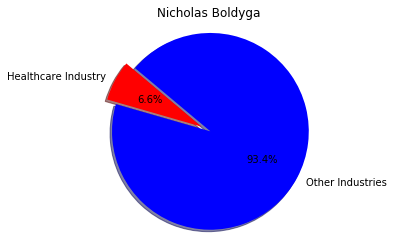

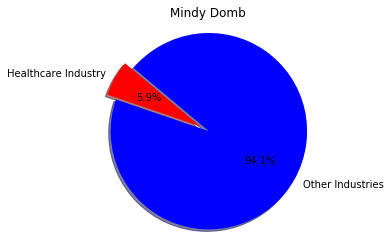

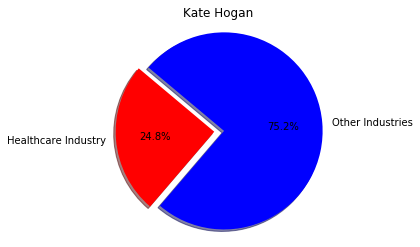

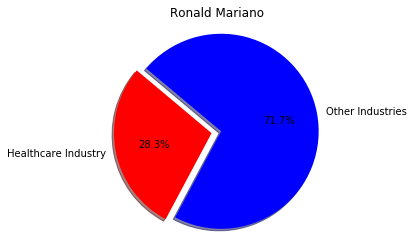

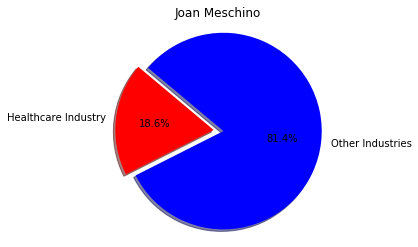

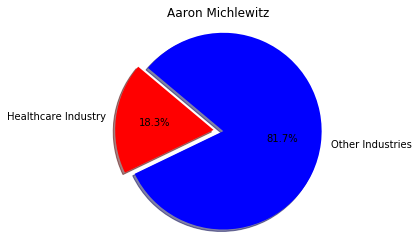

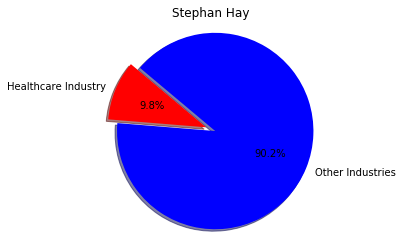

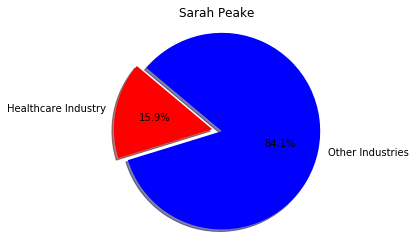

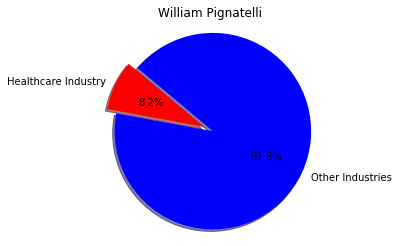

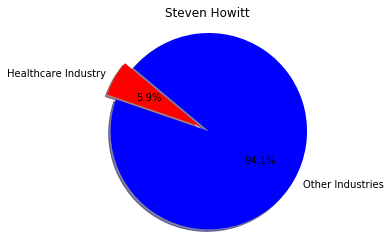

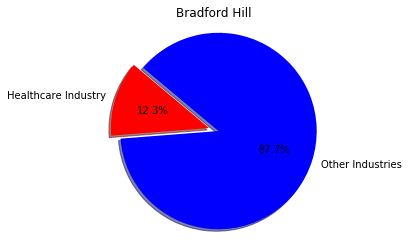

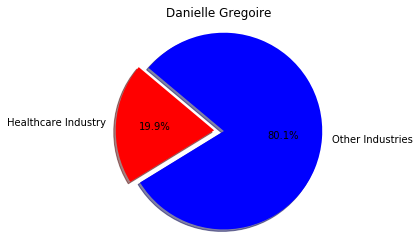

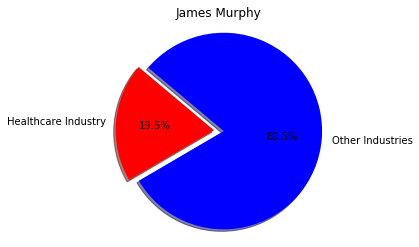

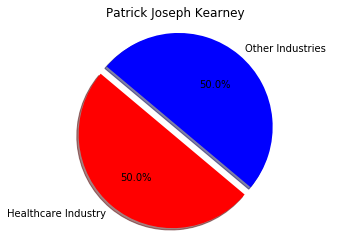

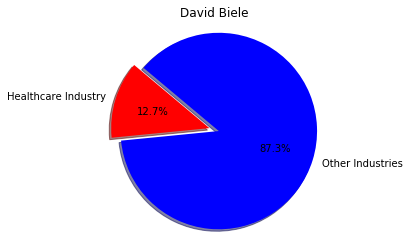

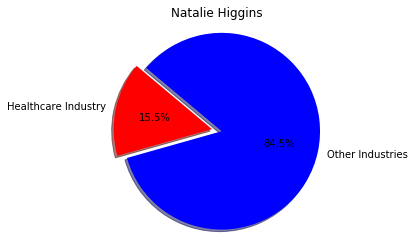

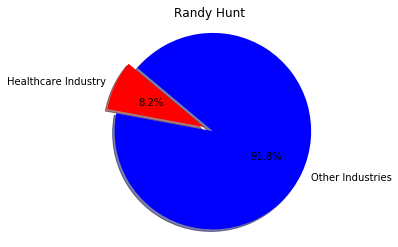

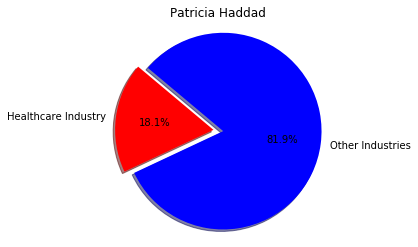

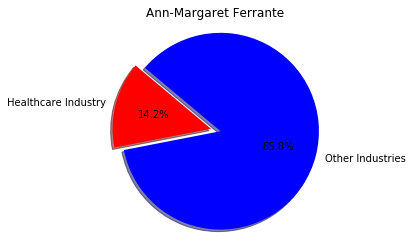

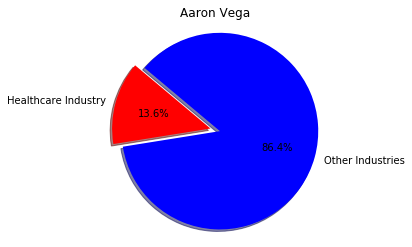

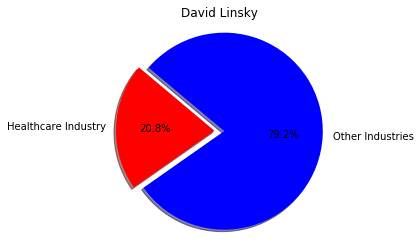

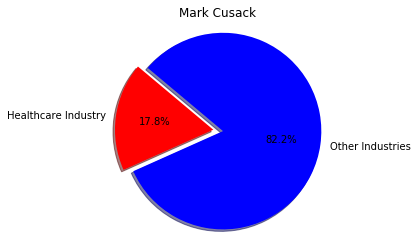

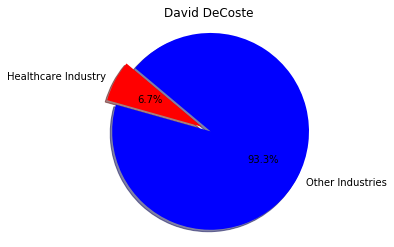

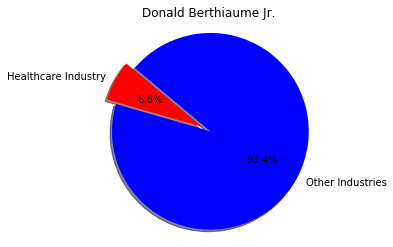

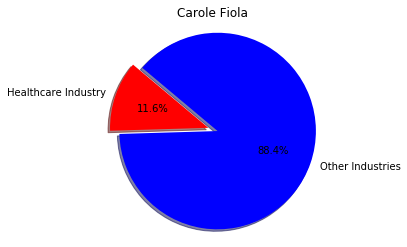

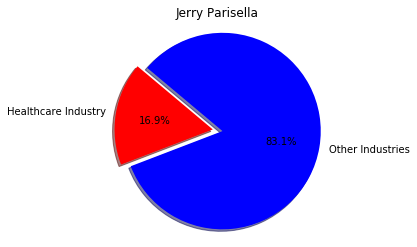

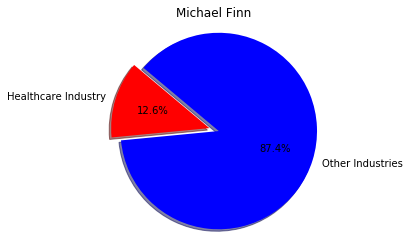

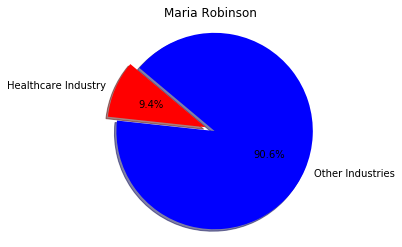

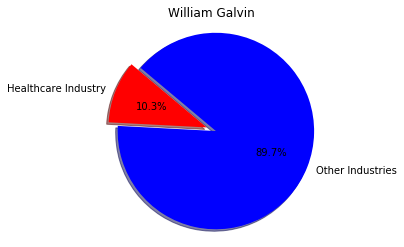

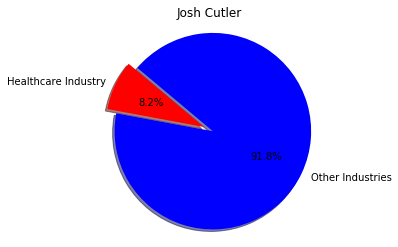

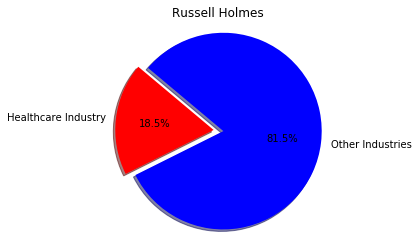

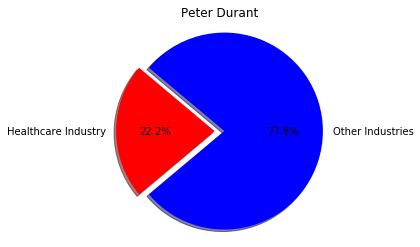

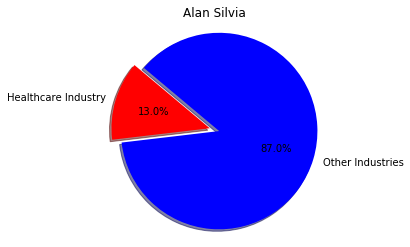

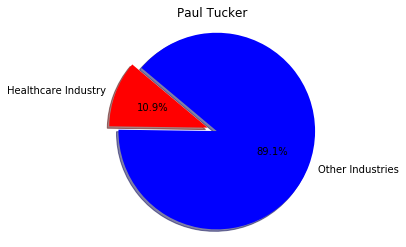

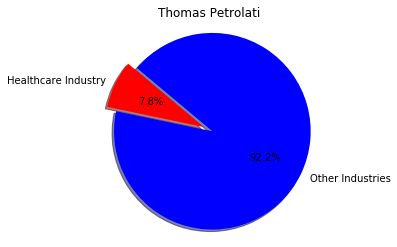

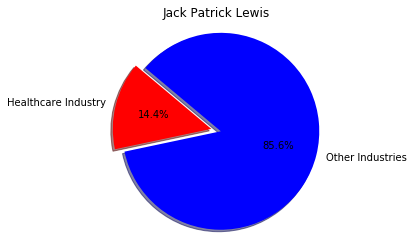

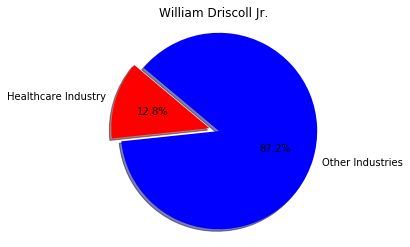

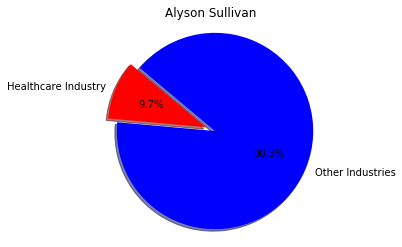

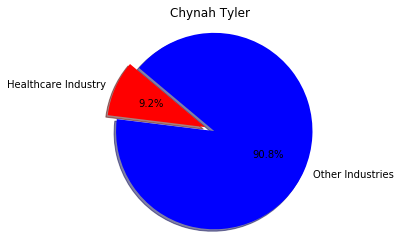

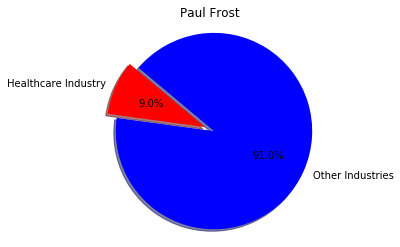

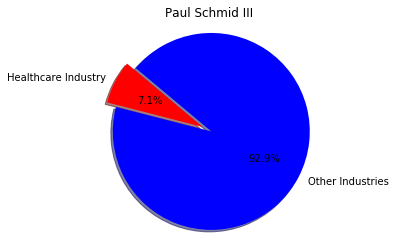

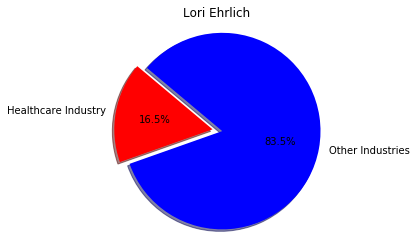

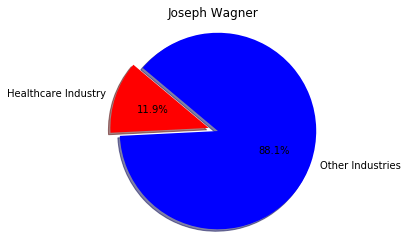

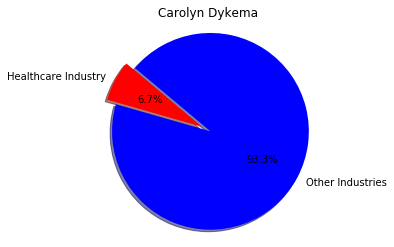

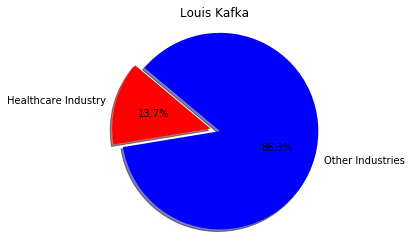

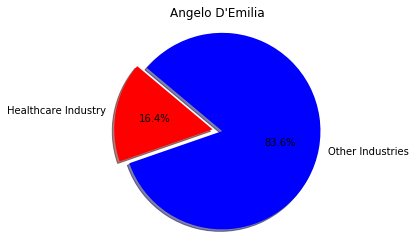

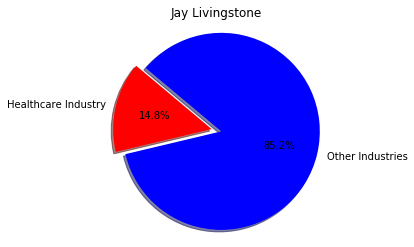

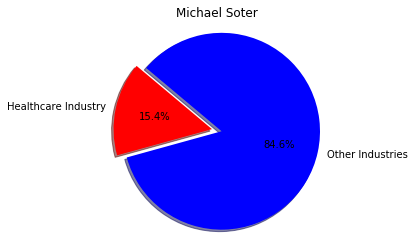

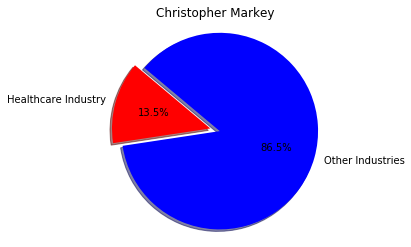

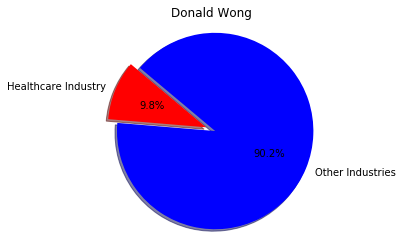

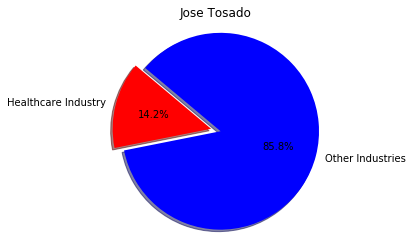

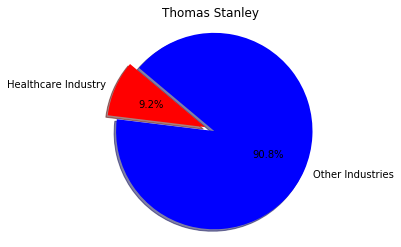

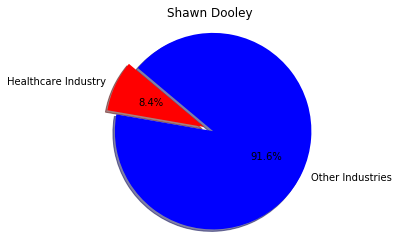

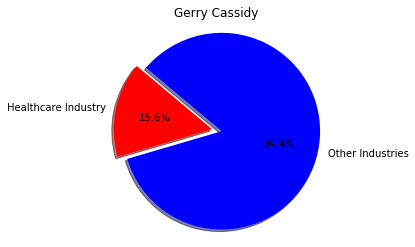

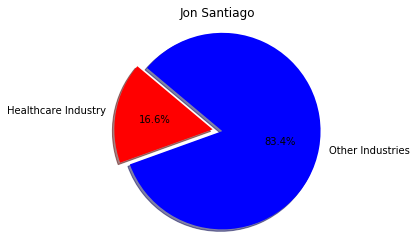

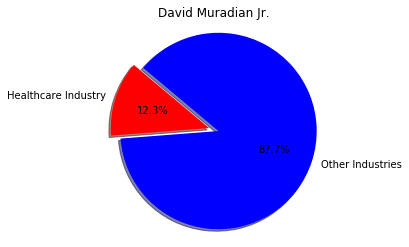

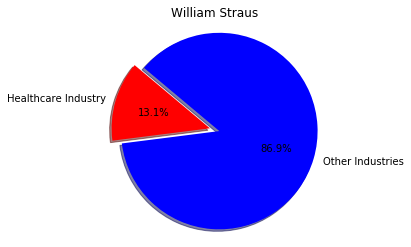

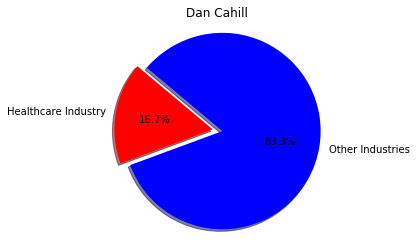

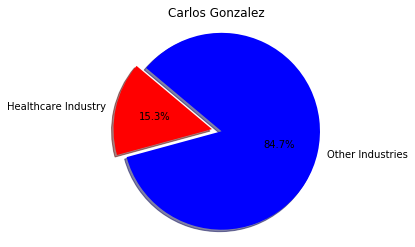

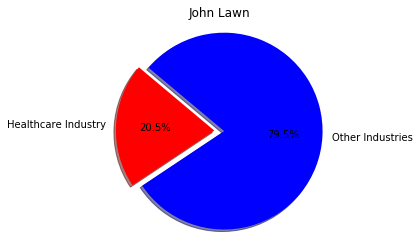

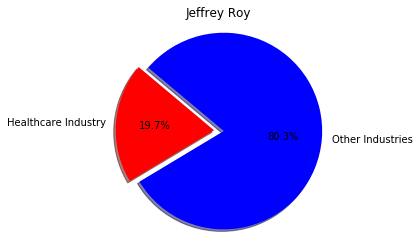

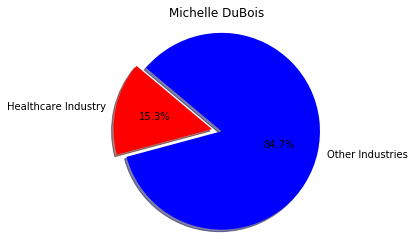

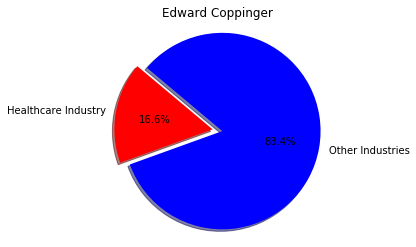

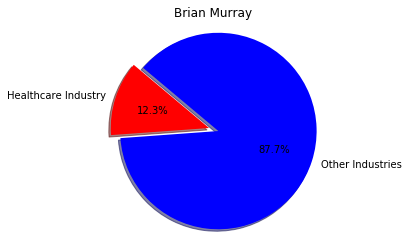

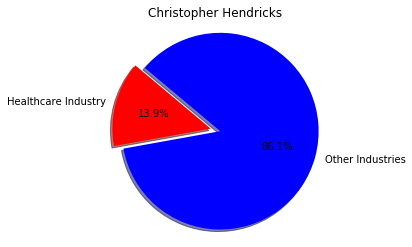

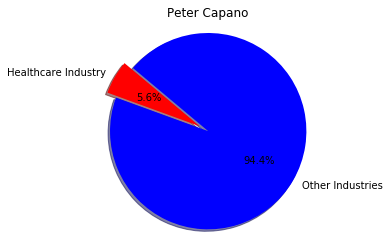

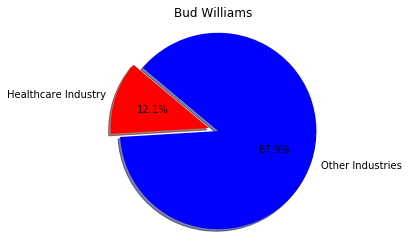

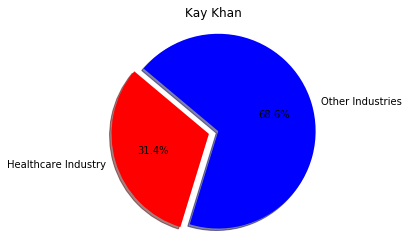

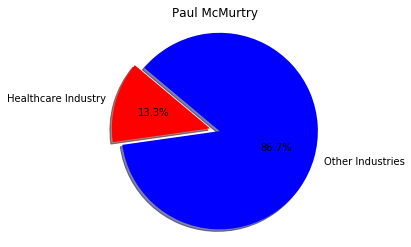

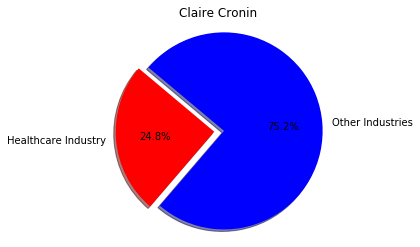

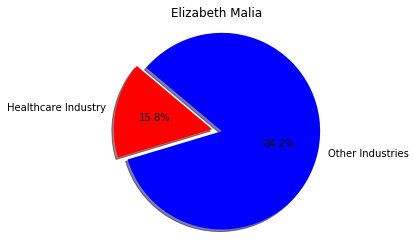

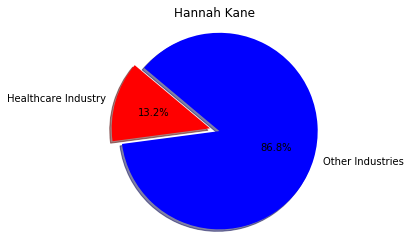

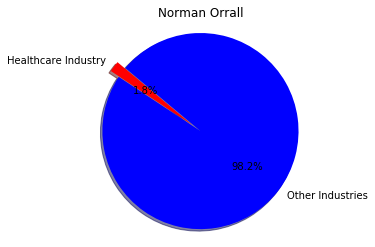

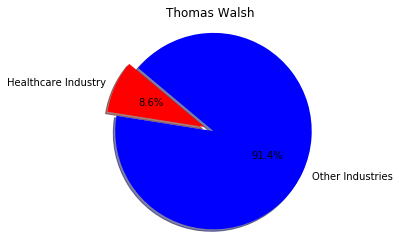

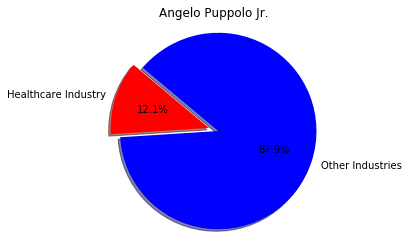

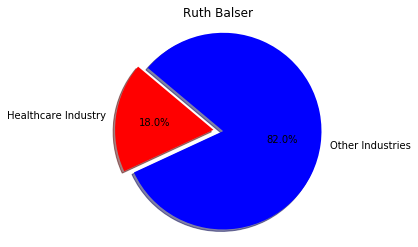

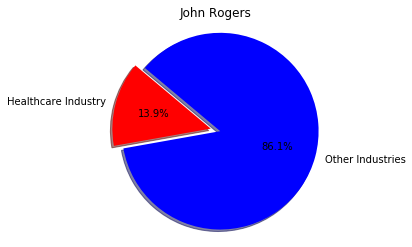

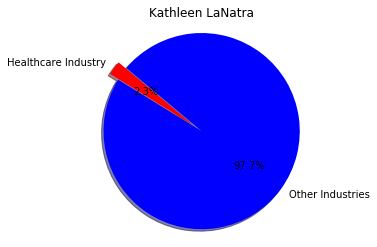

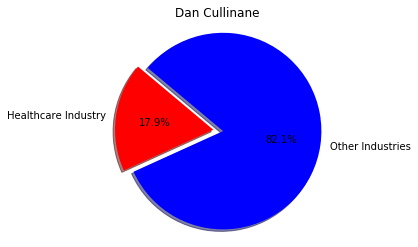

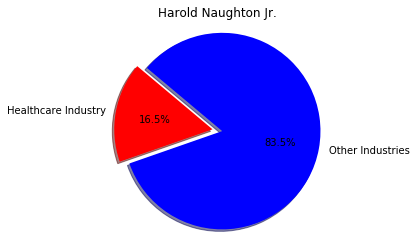

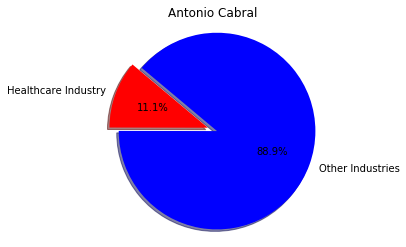

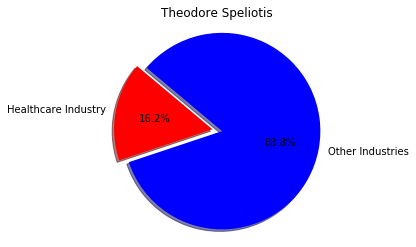

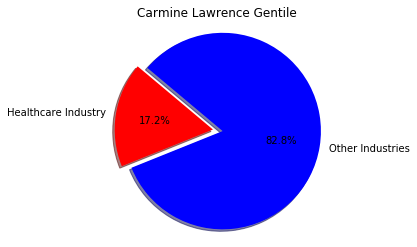

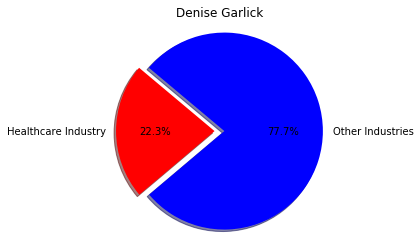

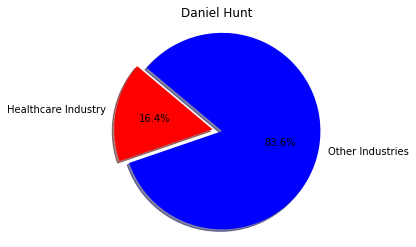

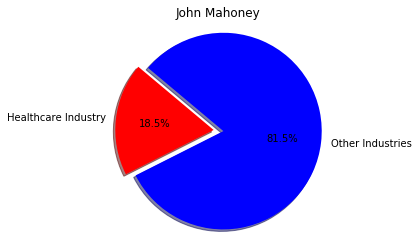

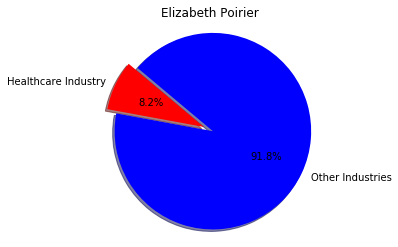

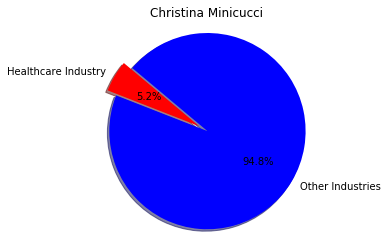

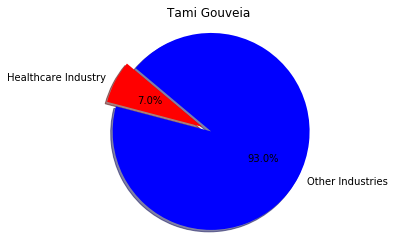

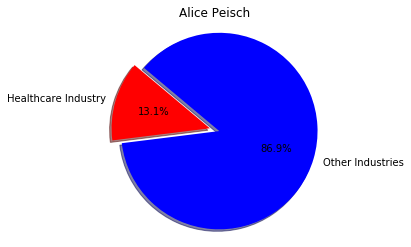

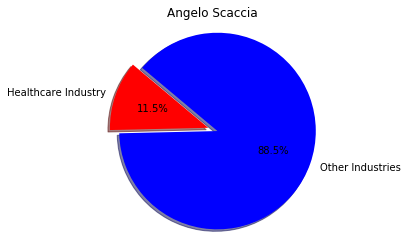

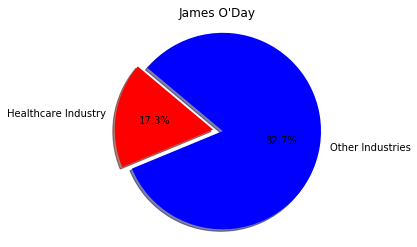

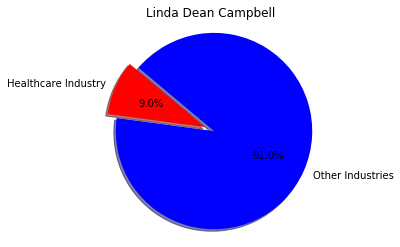

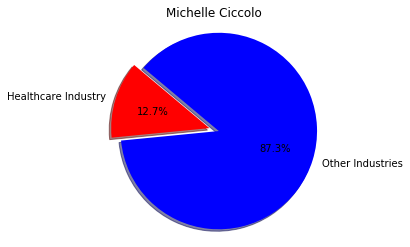

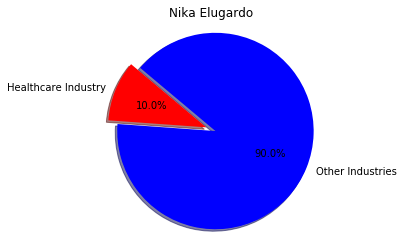

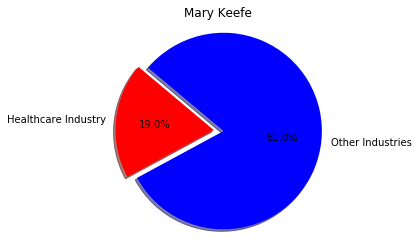

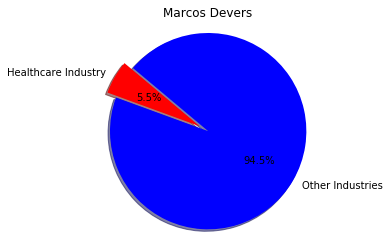

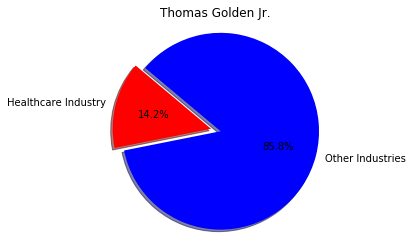

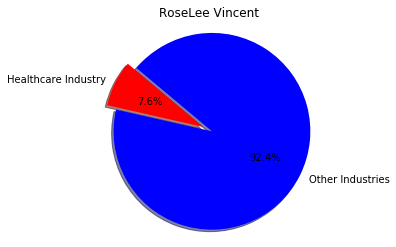

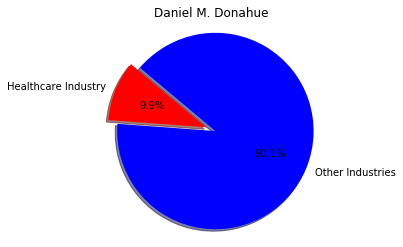

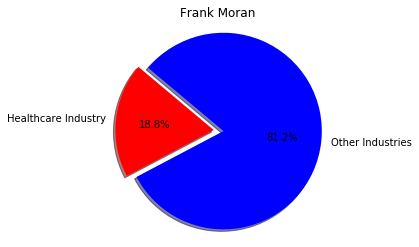

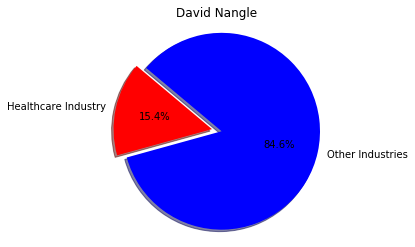

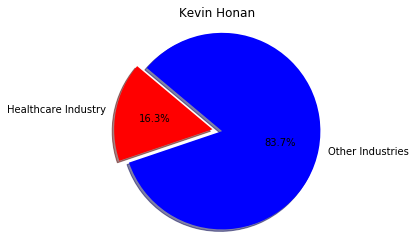

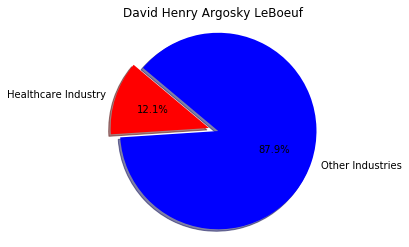

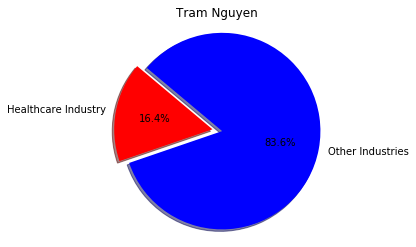

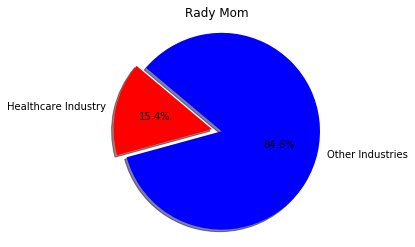

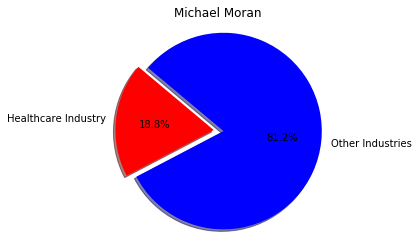

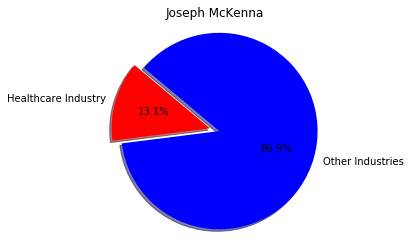

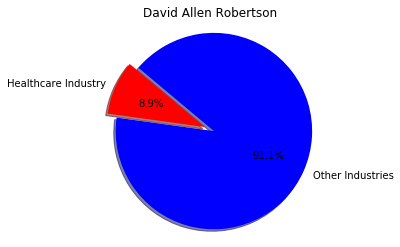

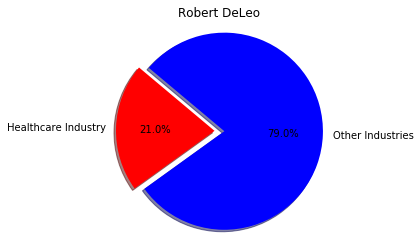

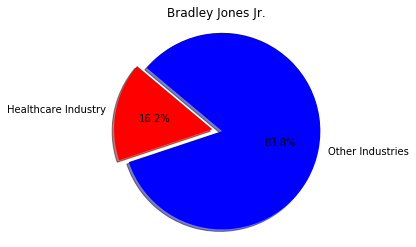

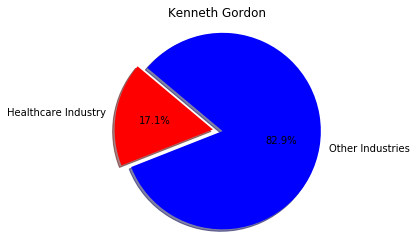

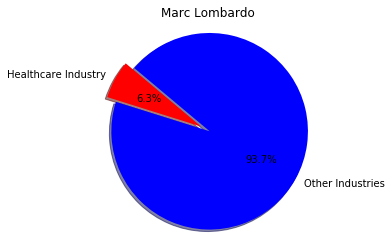

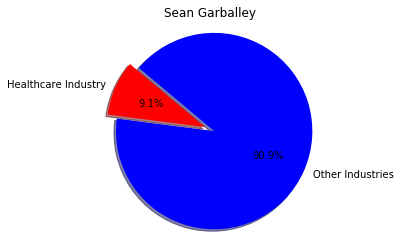

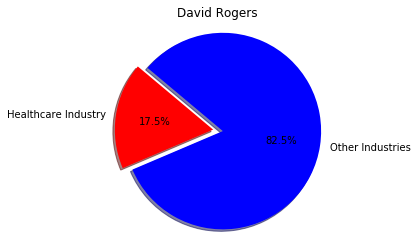

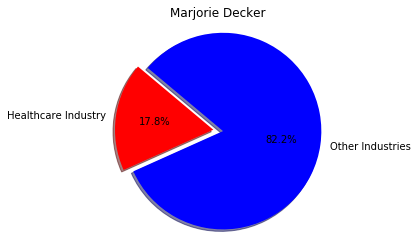

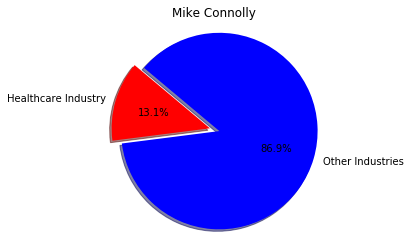

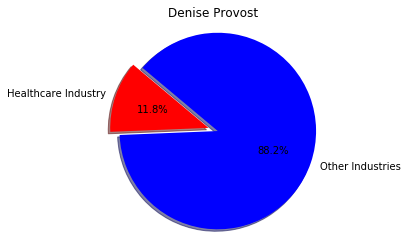

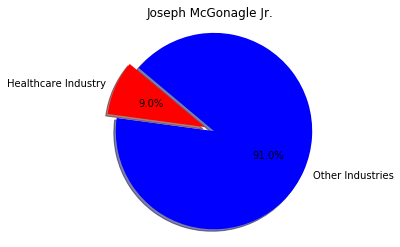

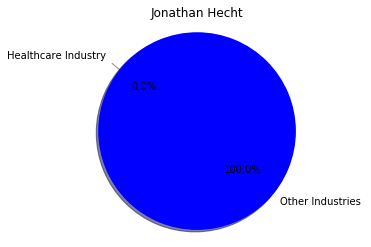

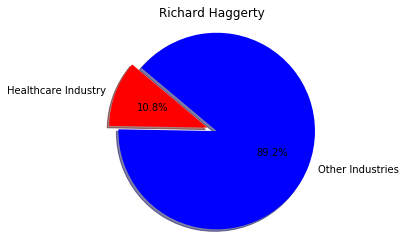

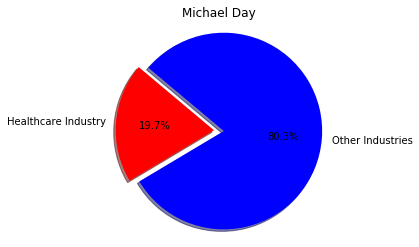

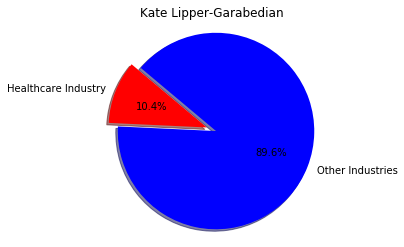

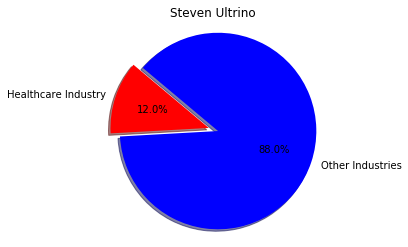

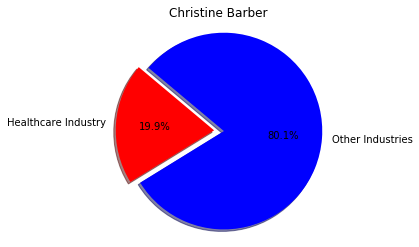

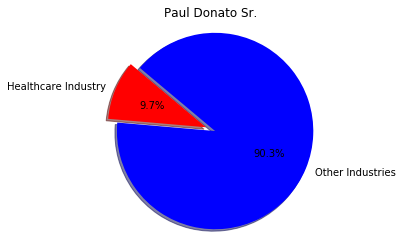

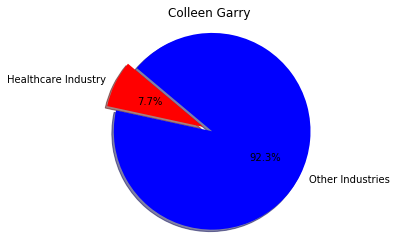

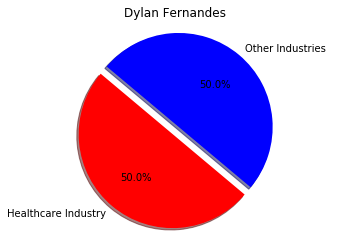

In [37]:
for idx,state_rep in enumerate(state_rep_donations['Rep_Name']):
    if state_rep_donations.iloc[idx]['total_donations'] > 0:
        donations_from_healthcare = state_rep_donations.iloc[idx]['donations_from_healthcare']
        total_donations = state_rep_donations.iloc[idx]['total_donations']
        plot_donations_from_healthcare(state_rep, donations_from_healthcare, total_donations)